# Projeto #2 - Classificador supervisionado

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


In [0]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
!ls '/content/gdrive/My Drive/Colab Notebooks/projeto_2'

In [0]:
olhos = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/projeto_2/olhosBD.csv")

In [0]:
# dados que devem ser classificados
target = olhos.Class

In [0]:
# retirar a coluna Class do DataFrame
df = olhos.drop(['Class'],axis=1)

In [0]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14'],
      dtype='object')

In [0]:
# Selecionando uma coluna
y_train[10:]

In [0]:
# selecionar somente a primeira feature
df = df.V1

In [0]:
# selecionar mais de uma feature
df = df.loc[0:1460,['V1','V2']] # seleciona as features v1 e v2 e 1460 linhas
target = target.loc[0:1460,] # seleciona 1460 linhas do target



---


**Dividindo os dados em treino e teste**

In [0]:
# importar train_test_split do sklearn para dividir dados de treino e teste
from sklearn.model_selection import train_test_split

In [0]:
# semente aleatória
RANDOM_STATE = 1

In [0]:
# o parâmetro test_size indica o percentual de amostras que serão selecionadas para teste
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    target, 
                                                    test_size=0.25, # 25% será amostra de teste
                                                    random_state=RANDOM_STATE,
                                                    stratify=target)

In [0]:
print('Número de linhas e número de colunas:', X_train.shape)

Número de linhas e número de colunas: (11235, 14)


In [0]:
print('Número de linhas e número de colunas:', y_train.shape)

Número de linhas e número de colunas: (11235,)


In [0]:
X_train.shape[0]

11235



---
**PERCEPTRON 1**


In [0]:
class Perceptron(object):

    def __init__(self, taxa_aprendizado, n_features, pesos=None, epocas=5):
      self.taxa_aprendizado = taxa_aprendizado
      if pesos is None:
        self.pesos = np.random.uniform(-1, 1, n_features)
      self.epocas = epocas

    # x_train é um DataFrame com as features do conjunto de dados
    # y_train é um Series com os rótulos (label) do conjunto de dados
    def fit(self, X_train, y_train):

      for e in range(self.epocas):

        print("---------------------------")
        print("Epoca:", e)

        qtde_erros = 0

        n_linhas = X_train.shape[0]
        for n in range(n_linhas):
          
          print("\t---------------------------")
          print("\tAmostra:", n)

          np_x = X_train.iloc[n].values
          np_y = y_train.iloc[n]

          print("\tx_atual:", np_x)
          print("\tpesos:", self.pesos)

          output = np.dot(self.pesos, np_x)
          print("\toutput:", output)

          heaveside = 1 if output >= 0 else 0
          print("\theaveside:", heaveside)

          # houve erro
          if heaveside != np_y:

            qtde_erros += 1
            erro = np_y - heaveside
            print("\terro:", erro)
            
            self.pesos = self.pesos + (self.taxa_aprendizado * erro * np_x)
            print("\tpesos atualizado:", self.pesos)

          else:
            print("\tsem erros")
        if qtde_erros == 0:
          # encerra o looping da epoca
          break

    def predict(self, X_test):

      np_x = X_test.values

      prediction = []
      for x in np_x:
        if self.pesos.dot(x) >= 0:
          prediction.append(1)
        else: 
          prediction.append(0)

      return prediction

In [0]:
perceptron = Perceptron(taxa_aprendizado=0.5, n_features=X_train.shape)

In [0]:
X_train[0:3]

In [0]:
y_train

In [12]:
perceptron.fit(X_train[0:15], y_train[0:15])
#perceptron.fit(X_train, y_train)

---------------------------
Epoca: 0
	---------------------------
	Amostra: 0
	x_atual: [4301.03 4020.51 4270.26 4133.85 4378.97 4651.28 4101.54 4638.46 4217.95
 4248.21 4221.54 4288.21 4639.49 4380.51]
	pesos: [[-0.96123817  0.15316393  0.52017913 ... -0.78363498  0.78771068
   0.67276314]
 [ 0.733762    0.42335343 -0.11050478 ... -0.68355369 -0.91429208
  -0.64627009]
 [ 0.36277365  0.25481481  0.25524995 ... -0.48206088 -0.80669848
   0.30661139]
 ...
 [ 0.11792359  0.29752871 -0.52873365 ... -0.10218096  0.25236576
   0.73665823]
 [-0.63885918  0.66819437 -0.05713171 ...  0.65395843  0.79168894
  -0.83517192]
 [ 0.0676439  -0.84484124 -0.28309212 ... -0.29985877  0.29641295
   0.19837756]]
	output: [-5736.22897876 -8777.90356238 -3375.07184041 ...  6799.35227249
 -5395.33073277 -7034.10609467]


ValueError: ignored



---
**PERCEPTRON 2**


In [0]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y=True)

In [0]:
# perceptron = Perceptron(taxa_aprendizado=0.3, n_features=X_train.shape[1])
clf = Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=15, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=1e-3,
           validation_fraction=0.3, verbose=0, warm_start=False)
clf.fit(X_train, y_train)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=15, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.3, verbose=0, warm_start=False)

In [0]:
Perceptron()

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
clf.score(X_traiX_train[:,1]n, y_train)

0.5946595460614152

Text(0, 0.5, 'target')

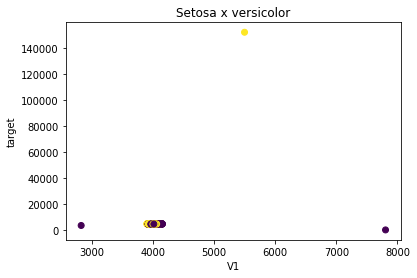

In [0]:
plt.scatter(X_train.V2,X_train.V13,c=y_train)
plt.title("Setosa x versicolor" )
plt.xlabel('V1')
plt.ylabel('target')